# Titanic Survival Prediction - Kaggle Competition
## Author: Monit Sharma
### Date: 01/12/24

### Import Necessary Libraries

In [1]:
# Import libraries
import pandas as pd               # Data manipulation
import numpy as np                # Numerical operations
import matplotlib.pyplot as plt   # Plotting
import seaborn as sns             # Advanced plotting

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


### Load the Dataset

In [2]:
# Load datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
gender_submission = pd.read_csv('dataset/gender_submission.csv')

# Display first few rows of training data
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Overview and Insights

In [3]:
# General info
print("Training Data Info:")
print(train.info())



Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print("\nTest Data Info:")
print(test.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values in Training Data:")
print(train.isnull().sum())

print("\nMissing Values in Test Data:")
print(test.isnull().sum())


Missing Values in Training Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing Values in Test Data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Data Visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


#### Survival Distribution

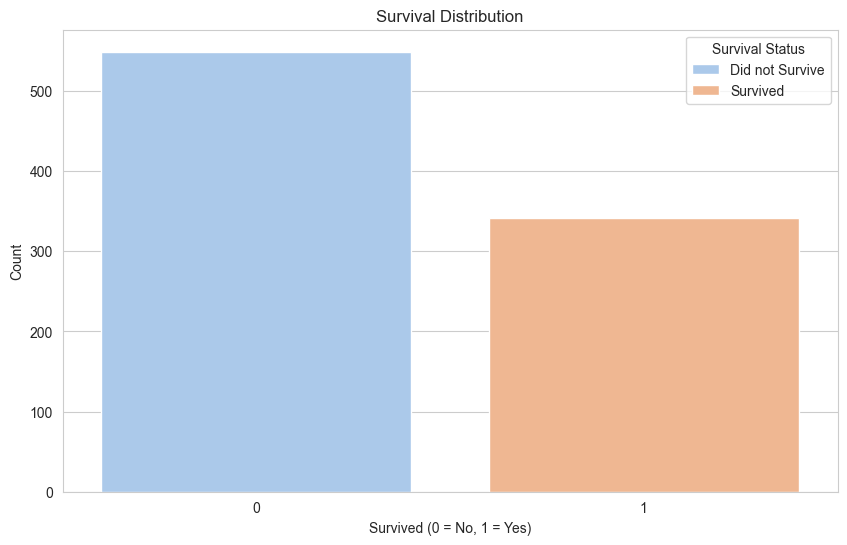

In [7]:
sns.countplot(data=train, x='Survived', palette='pastel', hue='Survived', dodge=False)
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(labels=["Did not Survive", "Survived"], title="Survival Status")
plt.show()


#### Survival by Gender

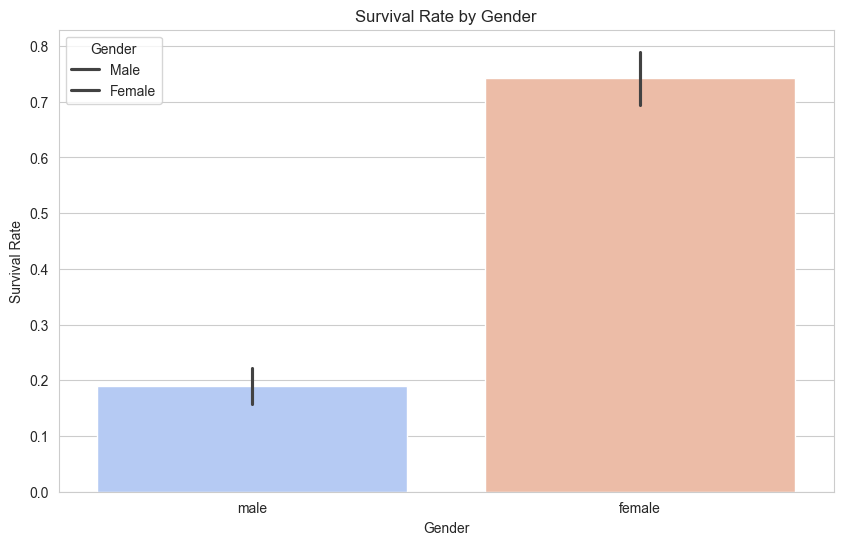

In [8]:
sns.barplot(data=train, x='Sex', y='Survived', hue='Sex', palette='coolwarm')
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.legend(labels=["Male", "Female"], title="Gender")
plt.show()


#### Survival Rate by Gender

1. Females had a significantly higher survival rate (~75%) compared to males (~20%).
2. This strongly aligns with the "women and children first" evacuation protocol that was followed during the Titanic disaster.

### Survival by Passenger Class

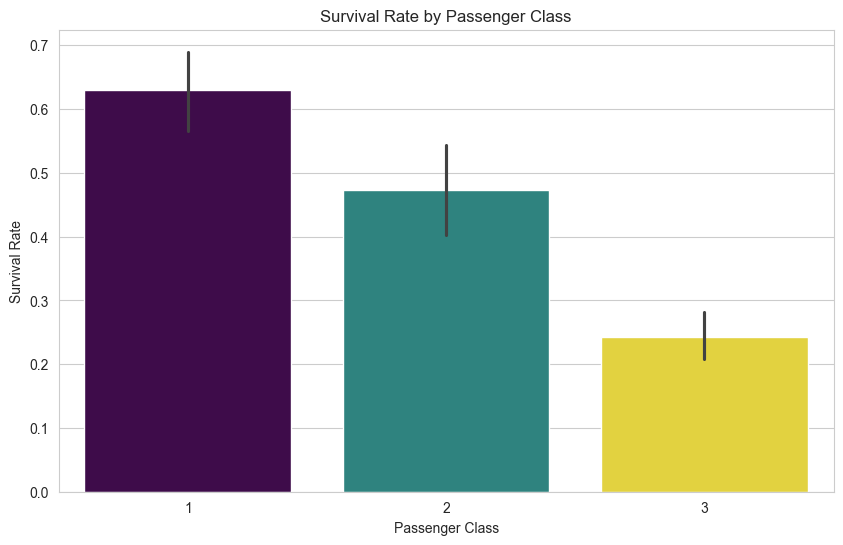

In [9]:
sns.barplot(data=train, x='Pclass', y='Survived', hue='Pclass', dodge=False, palette='viridis')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend([], [], frameon=False)  # Optionally disable the legend since hue is redundant
plt.show()


#### Survival Rate by Passenger Class

1. The survival rate decreases as passenger class increases.
2. First Class passengers had the highest survival rate (~60%).
3. Second Class passengers had a moderate survival rate (~40%).
4. Third Class passengers had the lowest survival rate (~20%).

This indicates a strong correlation between socio-economic status (represented by passenger class) and survival, suggesting a preference for higher-class passengers during rescue efforts.

### Age Distribution

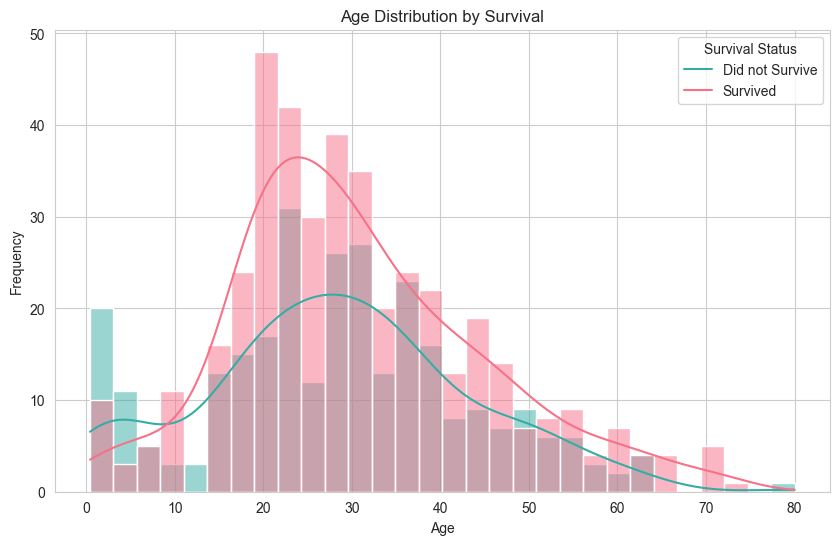

In [10]:
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True, palette='husl')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(labels=["Did not Survive", "Survived"], title="Survival Status")
plt.show()


#### Age Distribution by Survival

1. The plot shows the age distribution of passengers who survived and those who did not.
2. Younger passengers, especially children, had a higher survival rate. This may indicate that priority was given to younger individuals during the evacuation.
3. Passengers aged between 20-40 formed the majority of the passengers, but their survival rate was lower than that of children.
4. Elderly passengers had a significantly lower survival rate.

### Embarkation Port

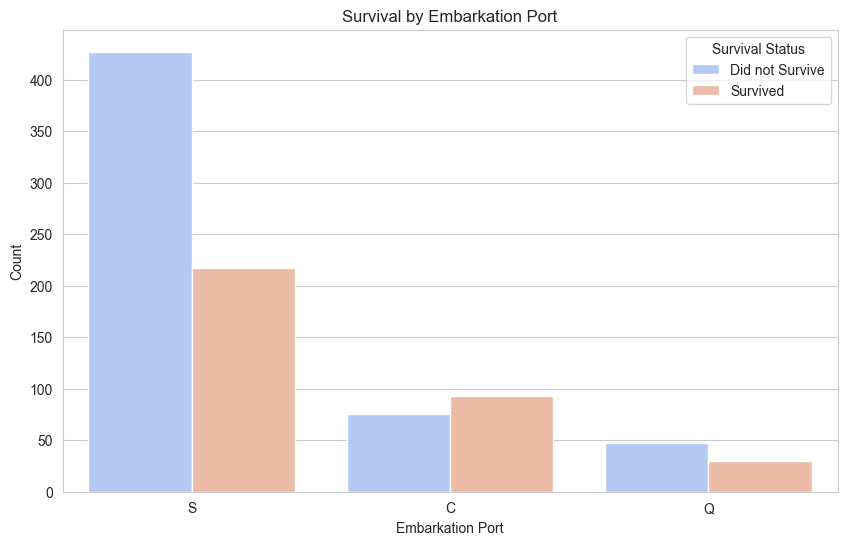

In [11]:
sns.countplot(data=train, x='Embarked', hue='Survived', palette='coolwarm')
plt.title("Survival by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(labels=["Did not Survive", "Survived"], title="Survival Status")
plt.show()


#### Survival by Embarkation Port

1. The majority of passengers embarked from Southampton (S), followed by Cherbourg (C), and then Queenstown (Q).
2. Passengers from Cherbourg (C) had the highest survival rate, followed by Southampton (S) and Queenstown (Q).
3. This trend could reflect differences in socio-economic profiles of passengers boarding from different ports.

### Feature Engineering

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for visuals
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [13]:
# Load datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')




In [14]:
# Combine datasets for consistent preprocessing
train['is_train'] = 1
test['is_train'] = 0
data = pd.concat([train, test], sort=False)

# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

# Feature: Family Size
data['FamilySize'] = data['SibSp'] + data['Parch']

# Feature: Is Alone
data['IsAlone'] = (data['FamilySize'] == 0).astype(int)

# Feature: Title (Extract from Name)
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                        'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# Feature: Fare per person
data['Fare_Per_Person'] = data['Fare'] / (data['FamilySize'] + 1)

# Drop irrelevant columns
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Encode categorical variables
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked', 'Title'], drop_first=True)


Separate Train and Test Data

In [15]:
# Separate train and test datasets
train = data[data['is_train'] == 1].drop('is_train', axis=1)
test = data[data['is_train'] == 0].drop(['is_train', 'Survived'], axis=1)

# Define features and target for train data
X = train.drop('Survived', axis=1)
y = train['Survived']

# Normalize continuous variables
scaler = StandardScaler()
X[['Age', 'Fare', 'Fare_Per_Person', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'Fare_Per_Person', 'FamilySize']])
test[['Age', 'Fare', 'Fare_Per_Person', 'FamilySize']] = scaler.transform(test[['Age', 'Fare', 'Fare_Per_Person', 'FamilySize']])


Handle Imbalanced Data

In [16]:
# Use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the balance of target labels
print("\nClass Distribution After SMOTE:\n", pd.Series(y_balanced).value_counts())



Class Distribution After SMOTE:
 Survived
0.0    549
1.0    549
Name: count, dtype: int64


#### Baseline (Logistic Regression)

In [17]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_balanced, y_balanced)
log_preds = log_model.predict(test)

# Save submission
submission_log = pd.read_csv('dataset/gender_submission.csv')
submission_log['Survived'] = log_preds
submission_log.to_csv('submission_logistic.csv', index=False)
print("Logistic Regression: submission_logistic.csv created")


Logistic Regression: submission_logistic.csv created


### Random Forest

In [18]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_balanced, y_balanced)
rf_preds = rf_model.predict(test)

# Save submission
submission_rf = pd.read_csv('dataset/gender_submission.csv')
submission_rf['Survived'] = rf_preds
submission_rf.to_csv('submission_random_forest.csv', index=False)
print("Random Forest: submission_random_forest.csv created")


Random Forest: submission_random_forest.csv created


### XGBoost

In [19]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed `use_label_encoder`
xgb_model.fit(X_balanced, y_balanced)

# Predict on test set
xgb_preds = xgb_model.predict(test)

# Save submission
submission_xgb = pd.read_csv('dataset/gender_submission.csv')  # Updated file path for gender_submission.csv
submission_xgb['Survived'] = xgb_preds
submission_xgb.to_csv('submission_xgboost.csv', index=False)
print("XGBoost: submission_xgboost.csv created")


XGBoost: submission_xgboost.csv created


### Random Forest HP Tuning

In [20]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_balanced, y_balanced)

# Best model
best_rf_model = grid.best_estimator_
print("Best Random Forest Parameters:", grid.best_params_)

# Predict with the tuned model
best_rf_preds = best_rf_model.predict(test)

# Save submission
submission_rf_tuned = pd.read_csv('dataset/gender_submission.csv')
submission_rf_tuned['Survived'] = best_rf_preds
submission_rf_tuned.to_csv('submission_rf_tuned.csv', index=False)
print("Tuned Random Forest: submission_rf_tuned.csv created")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest: submission_rf_tuned.csv created


### Evaluation


Train Test Split

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


#### Evaluation Function

In [22]:
def evaluate_model(model, X_val, y_val):
    """Evaluate a model using multiple metrics."""
    # Predict on validation set
    val_preds = model.predict(X_val)
    val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, val_preds)
    precision = precision_score(y_val, val_preds)
    recall = recall_score(y_val, val_preds)
    f1 = f1_score(y_val, val_preds)
    roc_auc = roc_auc_score(y_val, val_proba) if val_proba is not None else "N/A"
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'N/A'}")
    
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
    }


#### Let's Evaluate

In [23]:
# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)
print("Logistic Regression Metrics:")
log_metrics = evaluate_model(log_model, X_val, y_val)


Logistic Regression Metrics:
Accuracy: 0.8182
Precision: 0.8130
Recall: 0.8547
F1 Score: 0.8333
ROC-AUC: 0.9107957845821923


In [24]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("\nRandom Forest Metrics:")
rf_metrics = evaluate_model(rf_model, X_val, y_val)



Random Forest Metrics:
Accuracy: 0.8364
Precision: 0.8584
Recall: 0.8291
F1 Score: 0.8435
ROC-AUC: 0.8990540204132437


In [25]:
# XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("\nXGBoost Metrics:")
xgb_metrics = evaluate_model(xgb_model, X_val, y_val)



XGBoost Metrics:
Accuracy: 0.8773
Precision: 0.8879
Recall: 0.8803
F1 Score: 0.8841
ROC-AUC: 0.9339888805908223


In [26]:
# Tuned Random Forest (from GridSearchCV)
best_rf_model = grid.best_estimator_
best_rf_model.fit(X_train, y_train)
print("\nTuned Random Forest Metrics:")
tuned_rf_metrics = evaluate_model(best_rf_model, X_val, y_val)



Tuned Random Forest Metrics:
Accuracy: 0.8636
Precision: 0.8991
Recall: 0.8376
F1 Score: 0.8673
ROC-AUC: 0.9222471164218737


### Compare All

In [27]:
# Summarize metrics
metrics_summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost", "Tuned Random Forest"],
    "Accuracy": [log_metrics["accuracy"], rf_metrics["accuracy"], xgb_metrics["accuracy"], tuned_rf_metrics["accuracy"]],
    "Precision": [log_metrics["precision"], rf_metrics["precision"], xgb_metrics["precision"], tuned_rf_metrics["precision"]],
    "Recall": [log_metrics["recall"], rf_metrics["recall"], xgb_metrics["recall"], tuned_rf_metrics["recall"]],
    "F1 Score": [log_metrics["f1"], rf_metrics["f1"], xgb_metrics["f1"], tuned_rf_metrics["f1"]],
    "ROC-AUC": [log_metrics["roc_auc"], rf_metrics["roc_auc"], xgb_metrics["roc_auc"], tuned_rf_metrics["roc_auc"]],
})

# Display summary
print(metrics_summary)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.818182   0.813008  0.854701  0.833333  0.910796
1        Random Forest  0.836364   0.858407  0.829060  0.843478  0.899054
2              XGBoost  0.877273   0.887931  0.880342  0.884120  0.933989
3  Tuned Random Forest  0.863636   0.899083  0.837607  0.867257  0.922247


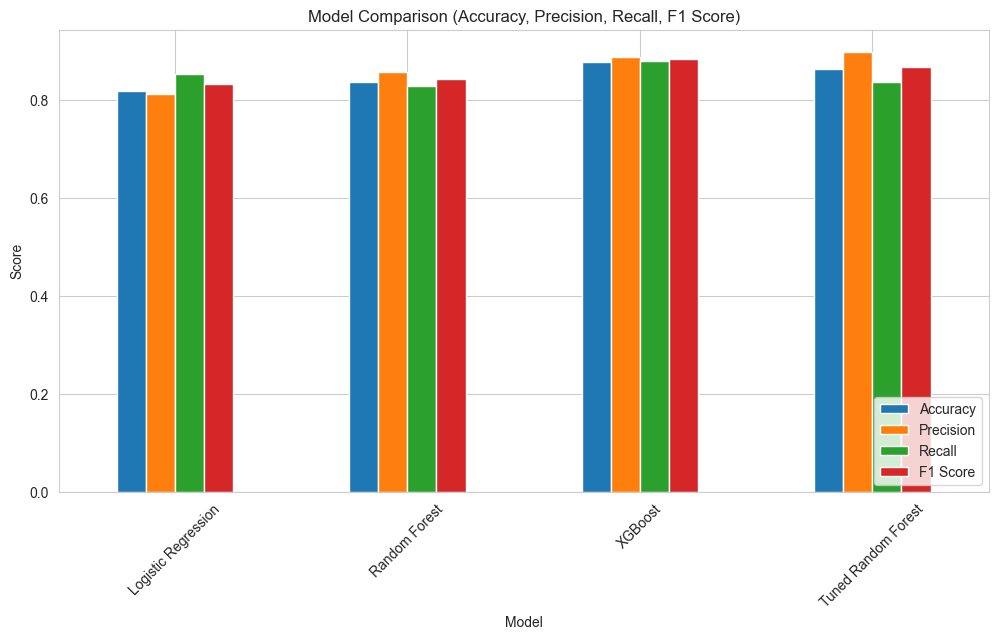

In [28]:
import matplotlib.pyplot as plt

# Plot Accuracy, Precision, Recall, F1 Score
metrics_summary.set_index("Model").drop("ROC-AUC", axis=1).plot(kind="bar", figsize=(12, 6))
plt.title("Model Comparison (Accuracy, Precision, Recall, F1 Score)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


### Let's Optimize even Further

##### Hyperparameter Tuning

Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'liblinear']  # Optimization algorithms
}

# GridSearchCV
log_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
log_grid.fit(X_train, y_train)

# Best parameters and model
best_log_model = log_grid.best_estimator_
print("Best Logistic Regression Parameters:", log_grid.best_params_)

# Validation accuracy
log_val_preds = best_log_model.predict(X_val)
log_accuracy = accuracy_score(y_val, log_val_preds)
print(f"Tuned Logistic Regression Validation Accuracy: {log_accuracy:.4f}")


Best Logistic Regression Parameters: {'C': 10, 'solver': 'lbfgs'}
Tuned Logistic Regression Validation Accuracy: 0.8182


Random Forest

In [30]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best parameters and model
best_rf_model = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)

# Validation accuracy
rf_val_preds = best_rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, rf_val_preds)
print(f"Tuned Random Forest Validation Accuracy: {rf_accuracy:.4f}")


Best Random Forest Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Validation Accuracy: 0.8682


XGBoost

In [31]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

# Best parameters and model
best_xgb_model = xgb_grid.best_estimator_
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# Validation accuracy
xgb_val_preds = best_xgb_model.predict(X_val)
xgb_accuracy = accuracy_score(y_val, xgb_val_preds)
print(f"Tuned XGBoost Validation Accuracy: {xgb_accuracy:.4f}")


Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost Validation Accuracy: 0.8727


Now, Let's see the scores

In [32]:
# Store scores in a dictionary
model_scores = {
    "Logistic Regression": log_accuracy,
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy,
}

# Convert the dictionary to a DataFrame for tabular representation
import pandas as pd

scores_df = pd.DataFrame(list(model_scores.items()), columns=["Model", "Validation Accuracy"])


In [33]:
# Display the table using pandas
print(scores_df)

# Optional: Use Jupyter's built-in rich display for better formatting
from IPython.display import display
display(scores_df)


                 Model  Validation Accuracy
0  Logistic Regression             0.818182
1        Random Forest             0.868182
2              XGBoost             0.872727


,Model,Validation Accuracy
0,Logistic Regression,0.818182
1,Random Forest,0.868182
2,XGBoost,0.872727


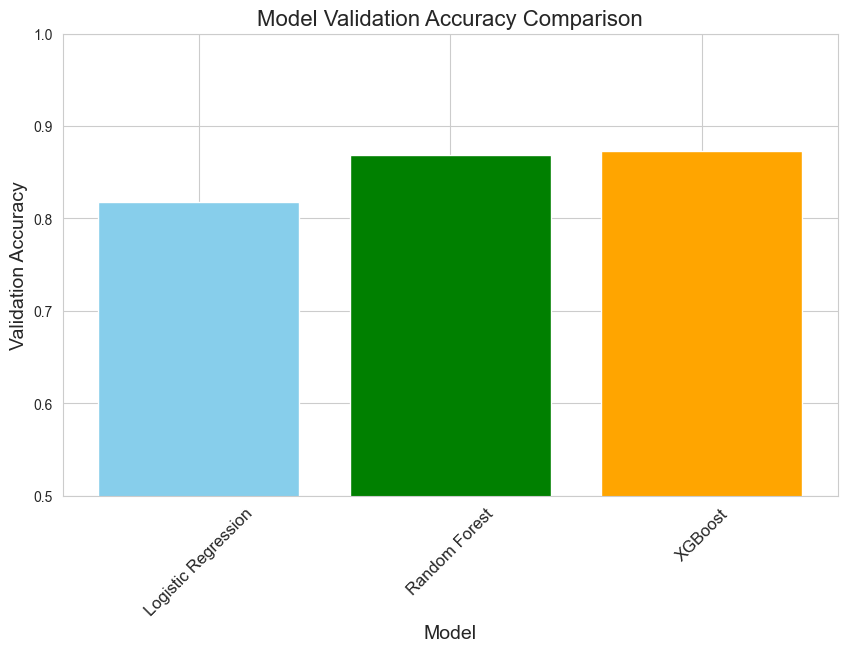

In [34]:
import matplotlib.pyplot as plt

# Plot scores
plt.figure(figsize=(10, 6))
plt.bar(scores_df["Model"], scores_df["Validation Accuracy"], color=["skyblue", "green", "orange", "purple"])
plt.title("Model Validation Accuracy Comparison", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Validation Accuracy", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0.5, 1.0)  # Assuming accuracy is between 50% and 100%
plt.show()


### Feature Selection and Engineering

            Feature  Importance
12         Title_Mr    0.166627
1               Sex    0.164919
5              Fare    0.125178
8   Fare_Per_Person    0.120885
2               Age    0.119577
0            Pclass    0.085963
6        FamilySize    0.049885
11       Title_Miss    0.043216
13        Title_Mrs    0.038736
3             SibSp    0.028113
4             Parch    0.017521
10       Embarked_S    0.011409
7           IsAlone    0.010804
14       Title_Rare    0.009603
9        Embarked_Q    0.007564


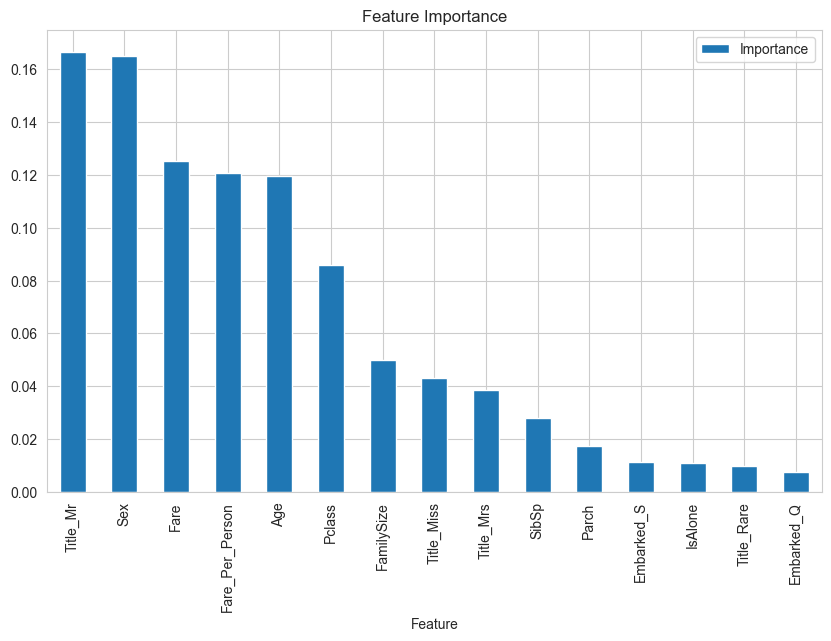

In [35]:
# Feature importance for Random Forest
importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plot feature importance
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importance')
plt.show()


Drop Low Importance

In [36]:
# Threshold for feature importance
threshold = 0.01

# Identify important features
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Reduce feature set
X_train_reduced = X[important_features]
X_val_reduced = X_val[important_features]
test_reduced = test[important_features]


In [38]:
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)


X_train_reduced shape: (891, 13)
y_train shape: (878,)


In [39]:
# Ensure alignment with important features
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']
X_train_reduced = X[important_features]  # Use X (not X_train_reduced) to avoid dropping rows


In [40]:
# Reset index for both
X_train_reduced = X_train_reduced.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [41]:
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)


X_train_reduced shape: (891, 13)
y_train shape: (878,)


In [43]:
print(y_train.isnull().sum())


0


In [44]:
y_train = y_train.dropna().reset_index(drop=True)


In [45]:
print("X_train_reduced indices:", X_train_reduced.index)
print("y_train indices:", y_train.index)


X_train_reduced indices: RangeIndex(start=0, stop=891, step=1)
y_train indices: RangeIndex(start=0, stop=878, step=1)


In [46]:
# Align indices
X_train_reduced = X_train_reduced.loc[y_train.index].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [47]:
print("Original X shape:", X.shape)
print("Original y shape:", y.shape)


Original X shape: (891, 15)
Original y shape: (891,)


In [48]:
X, y = X.loc[y.index], y.reset_index(drop=True)


In [49]:
print("X_train_reduced shape:", X_train_reduced.shape)
print("y_train shape:", y_train.shape)


X_train_reduced shape: (878, 13)
y_train shape: (878,)


Retain Model with Reduced feature 

In [50]:
log_model.fit(X_train_reduced, y_train)
log_val_preds_reduced = log_model.predict(X_val_reduced)
log_accuracy_reduced = accuracy_score(y_val, log_val_preds_reduced)
print(f"Reduced Logistic Regression Validation Accuracy: {log_accuracy_reduced:.4f}")


Reduced Logistic Regression Validation Accuracy: 0.6909


In [51]:
best_rf_model.fit(X_train_reduced, y_train)
rf_val_preds_reduced = best_rf_model.predict(X_val_reduced)
rf_accuracy_reduced = accuracy_score(y_val, rf_val_preds_reduced)
print(f"Reduced Random Forest Validation Accuracy: {rf_accuracy_reduced:.4f}")


Reduced Random Forest Validation Accuracy: 0.5500


In [52]:
best_xgb_model.fit(X_train_reduced, y_train)
xgb_val_preds_reduced = best_xgb_model.predict(X_val_reduced)
xgb_accuracy_reduced = accuracy_score(y_val, xgb_val_preds_reduced)
print(f"Reduced XGBoost Validation Accuracy: {xgb_accuracy_reduced:.4f}")


Reduced XGBoost Validation Accuracy: 0.5727
